In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv('F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_actives/W001_sound_CS.csv')
df.columns
df = df[['Unnamed: 0', 'average_RR', 'time_norm, ms']]
df

,Unnamed: 0,average_RR,"time_norm, ms"
0,0,12.516489,-2000
1,1,12.516489,-1999
2,2,12.516489,-1998
3,3,12.516489,-1997
4,4,12.516489,-1996
...,...,...,...
7995,7995,-62.730733,5995
7996,7996,-62.730733,5996
7997,7997,-62.730733,5997
7998,7998,-62.730733,5998


In [42]:
# Create an empty list to store DataFrames
data_frames = []

# Define the directory where your CSV files are located
data_directory = "F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_actives/"
stimulus = ['comb_CS','comb_CS_R','pict_CS','pict_CS_R','sound_CS','sound_CS_R']
# Loop through CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_directory, filename)
        df = pd.read_csv(file_path)
        df = df[['Unnamed: 0', 'average_RR', 'time_norm, ms']]
        df.insert(0, "subj", filename[0:4], True)
        f = len(filename) - 4
        df.insert(0, "stimulus", filename[5:f], True)
        data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)
combined_data.columns = ['stimulus', 'subject', 'timepoint', 'average_RR', 'time_norm, ms']
combined_data

,stimulus,subject,timepoint,average_RR,"time_norm, ms"
0,sound_CS,W001,0,12.516489,-2000
1,sound_CS,W001,1,12.516489,-1999
2,sound_CS,W001,2,12.516489,-1998
3,sound_CS,W001,3,12.516489,-1997
4,sound_CS,W001,4,12.516489,-1996
...,...,...,...,...,...
255995,comb_CS_R,W008,7995,-23.037965,5995
255996,comb_CS_R,W008,7996,-22.837965,5996
255997,comb_CS_R,W008,7997,-22.837965,5997
255998,comb_CS_R,W008,7998,-22.837965,5998


In [45]:
test = combined_data.groupby(['stimulus','timepoint'])
test

In [43]:
combined_data.to_csv('F:/MSUPE/piansrann/data_processing/ecg_average_8.csv')

In [31]:
grouped_data = combined_data.groupby('time_norm, ms')['average_RR']
grouped_data

In [32]:
# Group by the time column and calculate mean and standard deviation
#grouped_data = combined_data.groupby('timepoint', 'stimulus')['time_norm, ms']
mean_values = grouped_data.mean()
std_dev_values = grouped_data.std()


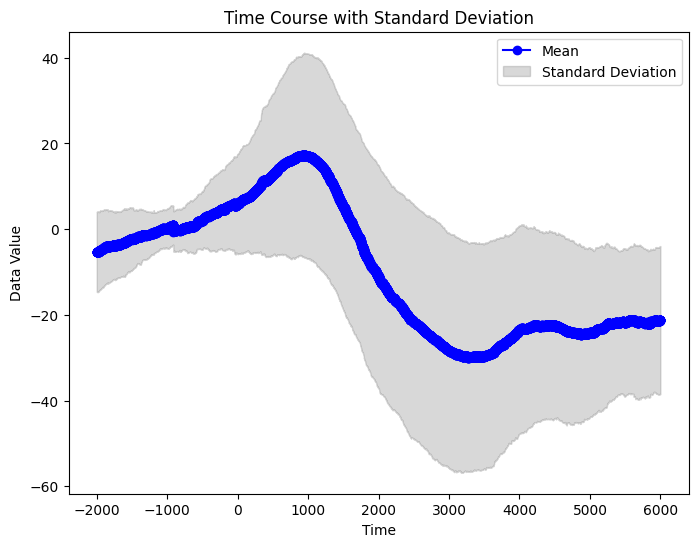

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the mean values
ax.plot(mean_values.index, mean_values.values, label='Mean', marker='o', color='blue')

# Plot standard deviation as error bars
ax.fill_between(mean_values.index, mean_values.values - std_dev_values.values, mean_values.values + std_dev_values.values, alpha=0.3, label='Standard Deviation', color='gray')

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Data Value')
ax.set_title('Time Course with Standard Deviation')
ax.legend()

# Save the plot to a file (e.g., for your scientific paper)
plt.savefig('time_course_with_std.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [35]:
grouped_data = combined_data.groupby(['average_RR', 'stimulus'])
grouped_data

In [38]:
mean_values

time_norm, ms
3452   -74.76675
3453   -74.76675
3454   -74.76675
3455   -74.76675
3456   -74.76675
3457   -74.76675
3458   -74.76675
3459   -74.76675
3460   -74.76675
3461   -74.76675
3462   -74.76675
3463   -74.76675
3464   -74.76675
3465   -74.76675
3466   -74.76675
3467   -74.76675
3468   -74.76675
3469   -74.76675
3470   -74.76675
3471   -74.76675
3472   -74.76675
3473   -74.76675
3474   -74.76675
3475   -74.76675
3476   -74.76675
3477   -74.76675
3478   -74.76675
3479   -74.76675
3480   -74.76675
3481   -74.76675
3482   -74.76675
3483   -74.76675
3484   -74.76675
3485   -74.76675
3486   -74.76675
3487   -74.76675
3488   -74.76675
3489   -74.76675
3490   -74.76675
3491   -74.76675
3492   -74.76675
3493   -74.76675
3494   -74.76675
3495   -74.76675
3496   -74.76675
3497   -74.76675
3498   -74.76675
3499   -74.76675
Name: average_RR, dtype: float64

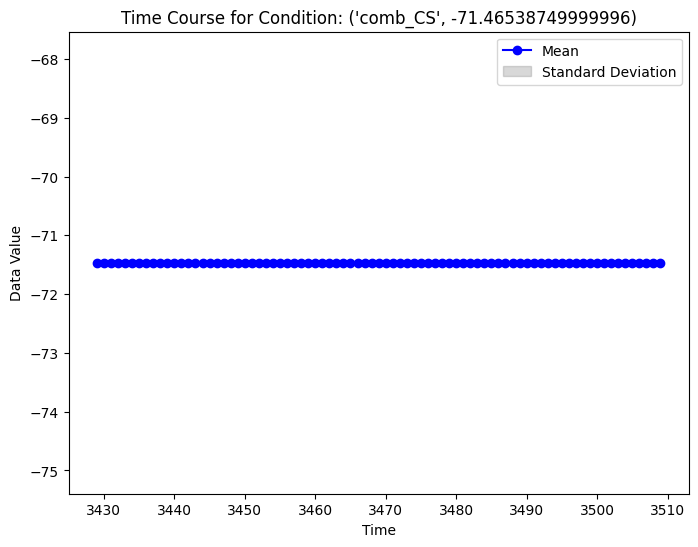

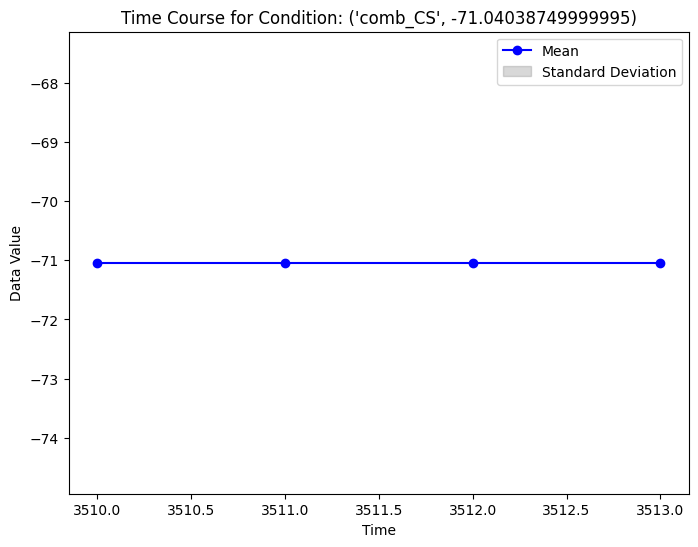

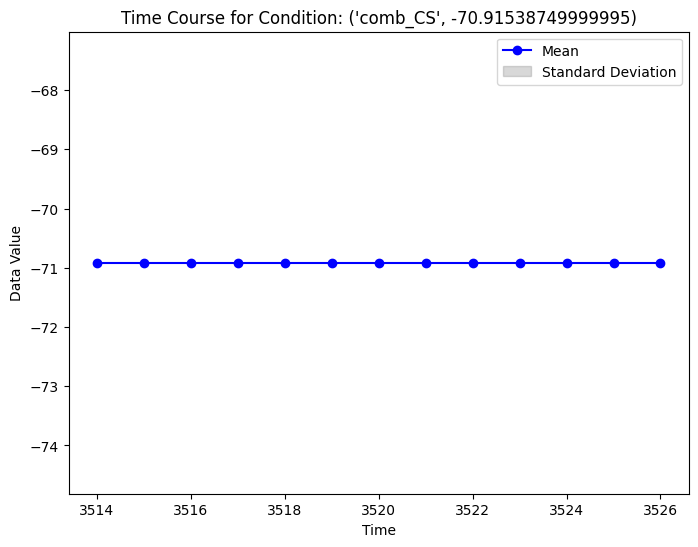

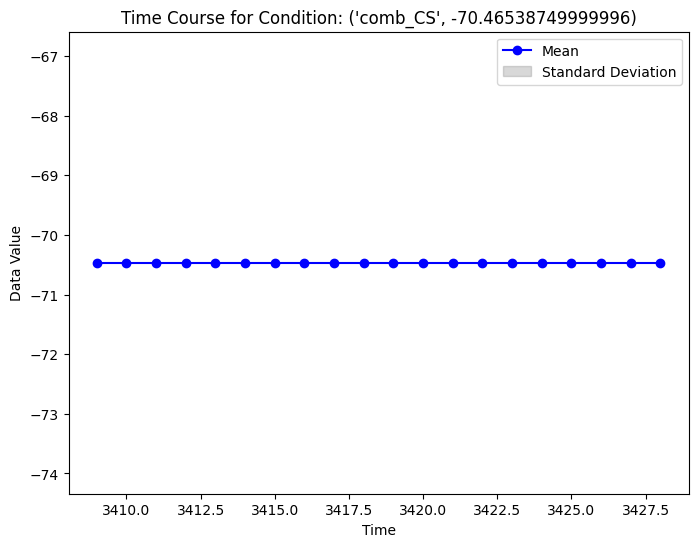

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [41]:


# Group by both data and condition columns
grouped_data = combined_data.groupby(['stimulus', 'average_RR'])

# Create a separate plot for each condition
for stimulus, group_data in grouped_data:
    # Calculate mean and standard deviation
    mean_values = group_data.groupby('time_norm, ms')['average_RR'].mean()
    std_dev_values = group_data.groupby('time_norm, ms')['average_RR'].std()
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the mean values
    ax.plot(mean_values.index, mean_values.values, label='Mean', marker='o', color='blue')

    # Plot standard deviation as error bars
    ax.fill_between(mean_values.index, mean_values.values - std_dev_values.values, mean_values.values + std_dev_values.values, alpha=0.3, label='Standard Deviation', color='gray')

    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel('Data Value')
    ax.set_title(f'Time Course for Condition: {stimulus}')
    ax.legend()

    # Save the plot to a file (e.g., for your scientific paper)
    plot_filename = f'time_course_with_std_condition_{stimulus}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

    # Show the plot (optional)
    plt.show()


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('F:/MSUPE/piansrann/data_processing/ecg_average_8.csv')


In [3]:
df

,Unnamed: 0,stimulus,subject,timepoint,average_RR,"time_norm, ms"
0,0,sound_CS,W001,0,12.516489,-2000
1,1,sound_CS,W001,1,12.516489,-1999
2,2,sound_CS,W001,2,12.516489,-1998
3,3,sound_CS,W001,3,12.516489,-1997
4,4,sound_CS,W001,4,12.516489,-1996
...,...,...,...,...,...,...
255995,255995,comb_CS_R,W008,7995,-23.037965,5995
255996,255996,comb_CS_R,W008,7996,-22.837965,5996
255997,255997,comb_CS_R,W008,7997,-22.837965,5997
255998,255998,comb_CS_R,W008,7998,-22.837965,5998


In [4]:
stimulus = ['comb_CS',
'comb_CS_R',
'pict_CS_1',
'pict_CS_2',
'pict_CS_R',
'sound_CS_1',
'sound_CS_2',
'sound_CS_R']

In [ ]:

grouped_data = combined_data.groupby(['stimulus', 'average_RR'])


In [1]:
import neurokit2 as nk
import mne
import os
import os.path as op
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [2]:
from scipy. stats import sem


In [ ]:
#tables

In [4]:
# Create an empty list to store DataFrames

# Define the directory where your CSV files are located
data_directory = "E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_actives/"
stimulus = ['comb_CS','comb_CS_R','pict_CS','pict_CS_R','sound_CS','sound_CS_R']
# Loop through CSV files in the directory
for s in stimulus:
    data_frames = []

    for filename in os.listdir(data_directory):
        if filename.endswith(f'{s}.csv'):
            file_path = os.path.join(data_directory, filename)
            df_0 = pd.read_csv(file_path)
            df = df_0[['average_RR']]
            #df.insert(0, "subj", filename[0:4], True)
            #f = len(filename) - 4
            #df.insert(0, "stimulus", filename[5:f], True)
            data_frames.append(df)

            # Concatenate all DataFrames into a single DataFrame
    combined_data = pd.concat(data_frames, ignore_index=True, axis=1)
    combined_data['average_RR'] = combined_data.mean(axis= 1)
    combined_data['SE_RR'] = combined_data.sem(axis= 1)
    combined_data['time_norm, ms'] = df_0[['time_norm, ms']]



    #combined_data.insert(0, "time_norm, ms", df_0[['time_norm, ms']], True)
    #combined_data.columns = ['stimulus', 'subject', 'timepoint', 'average_RR', 'time_norm, ms']
    combined_data.to_csv(f'E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_15/{s}.csv')



In [113]:
    #picture
    
    fig = plt.figure()
    df_for_ave1 = pd.DataFrame()
    df_for_ave2 = pd.DataFrame()
    df_timecourse1 = pd.read_csv(op.join(data_path, f'pict_CS.csv'))
    df_timecourse2 = pd.read_csv(op.join(data_path, f'pict_CS_R.csv'))

    df_for_ave1['average_RR'] = df_timecourse1['average_RR']
    df_for_ave2['average_RR'] = df_timecourse2['average_RR']

                

                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave1['average_RR'].tolist(), color = 'turquoise', label='pict_CS')
    plt.fill_between(df_for_ave1['average_RR'], 10, 30, alpha=0.3, color='turquoise')
            
                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave2['average_RR'].tolist(), color = 'red', label='pict_CS_R')              
                
     
    plt.legend(loc='best')
    plt.xlabel('Time, ms')
    plt.ylabel('Length R-R, ms')
    plt.title('average ')
    #plt.title(f'{subj} , {r}, CS+P vs {stimulus_name[sn]}')
    #plt.ylim([-140, 220]) 
    plt.ylim([-120, 160]) 
    plt.xlim([-2000, 6000])
    plt.axvline(x = 1970, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 3940, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 0, color = 'k', label='line 2',linestyle='dashed',linewidth=1)
    #plt.axhline(y = 0, color = 'k', label='line 1',linestyle='dashed',linewidth=1)
                

    plt.grid(which='major', color = 'k', linestyle = ':')
                

    fig.savefig('F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/av_av/pics/average_pict_CS_vs_pict_CS_R.jpeg', dpi=300)
    plt.close()

TypeError: 'Figure' object is not callable

In [5]:
import matplotlib.pyplot as plt

In [7]:
    #picture
    data_path = 'E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_15'
    fig = plt.figure()
    df_for_ave1 = pd.DataFrame()
    df_for_ave2 = pd.DataFrame()
    df_timecourse1 = pd.read_csv(op.join(data_path, f'pict_CS.csv'))
    df_timecourse2 = pd.read_csv(op.join(data_path, f'pict_CS_R.csv'))

    df_for_ave1['average_RR'] = df_timecourse1['average_RR']
    df_for_ave1['SE_RR'] = df_timecourse1['SE_RR']
    df_for_ave2['average_RR'] = df_timecourse2['average_RR']
    df_for_ave2['SE_RR'] = df_timecourse2['SE_RR']
    err_n = df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values
    err_p = df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values 
    #x_plt = df_for_ave1['average_RR'].values
    x_plt = df_0['time_norm, ms'].values
                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave1['average_RR'].tolist(), color = 'turquoise', label='pict_CS')
    #plt.fill_between(df_for_ave1['average_RR'], 10, 30, alpha=0.3, color='turquoise')
    plt.fill_between(x_plt, df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values, df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values, alpha=0.1, color='turquoise')

                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave2['average_RR'].tolist(), color = 'red', label='pict_CS_R')
    plt.fill_between(x_plt, df_for_ave2['average_RR'].values - df_for_ave2['SE_RR'].values, df_for_ave2['average_RR'].values + df_for_ave2['SE_RR'].values, alpha=0.1, color='red')
    #plt.plot(df_0['time_norm, ms'].tolist(), minus, color = 'black', label='test-', alpha=0.1 )
    #plt.plot(df_0['time_norm, ms'].tolist(), plus, color = 'black', label='test+', alpha=0.1 )
            
     
    plt.legend(loc='best')
    plt.xlabel('Time, ms')
    plt.ylabel('Length R-R, ms')
    plt.title('Average Length R-R, ms, Picture')
    #plt.title(f'{subj} , {r}, CS+P vs {stimulus_name[sn]}')
    #plt.ylim([-140, 220]) 
    plt.ylim([-120, 160]) 
    plt.xlim([-2000, 6000])
    plt.axvline(x = 1970, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 3940, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 0, color = 'k', label='line 2',linestyle='dashed',linewidth=1)
    #plt.axhline(y = 0, color = 'k', label='line 1',linestyle='dashed',linewidth=1)
                

    plt.grid(which='major', color = 'k', linestyle = ':')
                

    fig.savefig('E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_15/pics/average_pict_CS_vs_pict_CS_R.jpeg', dpi=300)
    plt.close()

In [8]:
    # sound
    fig = plt.figure()
    df_for_ave1 = pd.DataFrame()
    df_for_ave2 = pd.DataFrame()
    df_timecourse1 = pd.read_csv(op.join(data_path, f'sound_CS.csv'))
    df_timecourse2 = pd.read_csv(op.join(data_path, f'sound_CS_R.csv'))

    df_for_ave1['average_RR'] = df_timecourse1['average_RR']
    df_for_ave1['SE_RR'] = df_timecourse1['SE_RR']
    df_for_ave2['average_RR'] = df_timecourse2['average_RR']
    df_for_ave2['SE_RR'] = df_timecourse2['SE_RR']
    err_n = df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values
    err_p = df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values 
    #x_plt = df_for_ave1['average_RR'].values
    x_plt = df_0['time_norm, ms'].values
                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave1['average_RR'].tolist(), color = 'turquoise', label='sound_CS')
    #plt.fill_between(df_for_ave1['average_RR'], 10, 30, alpha=0.3, color='turquoise')
    plt.fill_between(x_plt, df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values, df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values, alpha=0.2, color='turquoise')

                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave2['average_RR'].tolist(), color = 'red', label='sound_CS_R')
    plt.fill_between(x_plt, df_for_ave2['average_RR'].values - df_for_ave2['SE_RR'].values, df_for_ave2['average_RR'].values + df_for_ave2['SE_RR'].values, alpha=0.2, color='red')
    #plt.plot(df_0['time_norm, ms'].tolist(), minus, color = 'black', label='test-', alpha=0.1 )
    #plt.plot(df_0['time_norm, ms'].tolist(), plus, color = 'black', label='test+', alpha=0.1 )
            
     
    plt.legend(loc='best')
    plt.xlabel('Time, ms')
    plt.ylabel('Length R-R, ms')
    plt.title('Average Length R-R, ms, Sound')
    #plt.title(f'{subj} , {r}, CS+P vs {stimulus_name[sn]}')
    #plt.ylim([-140, 220]) 
    plt.ylim([-120, 160]) 
    plt.xlim([-2000, 6000])
    plt.axvline(x = 1970, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 3940, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 0, color = 'k', label='line 2',linestyle='dashed',linewidth=1)
    #plt.axhline(y = 0, color = 'k', label='line 1',linestyle='dashed',linewidth=1)
                

    plt.grid(which='major', color = 'k', linestyle = ':')
                

    fig.savefig('E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_15/pics/average_sound_CS_vs_sound_CS_R.jpeg', dpi=300)
    plt.close()

In [10]:
    # comb
    fig = plt.figure()
    df_for_ave1 = pd.DataFrame()
    df_for_ave2 = pd.DataFrame()
    df_timecourse1 = pd.read_csv(op.join(data_path, f'comb_CS.csv'))
    df_timecourse2 = pd.read_csv(op.join(data_path, f'comb_CS_R.csv'))

    df_for_ave1['average_RR'] = df_timecourse1['average_RR']
    df_for_ave1['SE_RR'] = df_timecourse1['SE_RR']
    df_for_ave2['average_RR'] = df_timecourse2['average_RR']
    df_for_ave2['SE_RR'] = df_timecourse2['SE_RR']
    err_n = df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values
    err_p = df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values 
    #x_plt = df_for_ave1['average_RR'].values
    x_plt = df_0['time_norm, ms'].values
                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave1['average_RR'].tolist(), color = 'turquoise', label='complex_CS')
    #plt.fill_between(df_for_ave1['average_RR'], 10, 30, alpha=0.3, color='turquoise')
    plt.fill_between(x_plt, df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values, df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values, alpha=0.2, color='turquoise')

                
    plt.plot(df_0['time_norm, ms'].tolist(), df_for_ave2['average_RR'].tolist(), color = 'red', label='complex_CS_R')
    plt.fill_between(x_plt, df_for_ave2['average_RR'].values - df_for_ave2['SE_RR'].values, df_for_ave2['average_RR'].values + df_for_ave2['SE_RR'].values, alpha=0.1, color='red')
    #plt.plot(df_0['time_norm, ms'].tolist(), minus, color = 'black', label='test-', alpha=0.1 )
    #plt.plot(df_0['time_norm, ms'].tolist(), plus, color = 'black', label='test+', alpha=0.1 )
            
     
    plt.legend(loc='best')
    plt.xlabel('Time, ms')
    plt.ylabel('Length R-R, ms')
    plt.title('Average Length R-R, ms, Complex')
    #plt.title(f'{subj} , {r}, CS+P vs {stimulus_name[sn]}')
    #plt.ylim([-140, 220]) 
    plt.ylim([-120, 160]) 
    plt.xlim([-2000, 6000])
    plt.axvline(x = 1970, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 3940, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
    plt.axvline(x = 0, color = 'k', label='line 2',linestyle='dashed',linewidth=1)
    #plt.axhline(y = 0, color = 'k', label='line 1',linestyle='dashed',linewidth=1)
                

    plt.grid(which='major', color = 'k', linestyle = ':')
                

    fig.savefig('E:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/average_15/pics/average_complex_CS_vs_complex_CS_R.jpeg', dpi=300)
    plt.close()

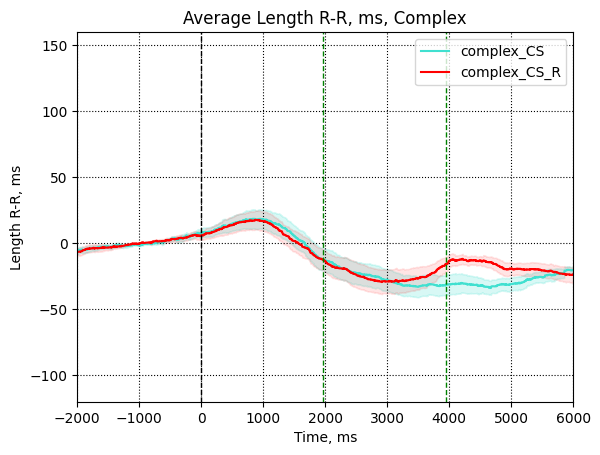

In [158]:
fig

In [111]:
# Create a figure and axis
minus = df_for_ave1['average_RR'].values - df_for_ave1['SE_RR'].values
plus = df_for_ave1['average_RR'].values + df_for_ave1['SE_RR'].values 
x_pl = df_for_ave1['average_RR'].values
y_pl = df_0['time_norm, ms'].values

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the mean values
ax.plot(y_pl, x_pl, label='Mean', marker='o', color='blue')

# Plot standard deviation as error bars
ax.fill_between(x_pl, minus, plus, alpha=0.3, label='Standard Deviation', color='gray')

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Data Value')
ax.set_title('Time Course with Standard Deviation')
ax.legend()

# Save the plot to a file (e.g., for your scientific paper)
#plt.savefig('time_course_with_std.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


AttributeError: 'Axes' object has no attribute 'subplots'

In [110]:
df_for_ave1

,average_RR,SE_RR
0,-5.496849,3.213805
1,-5.496849,3.213805
2,-5.496849,3.213805
3,-5.496849,3.213805
4,-5.378099,3.201659
...,...,...
7995,-11.032266,2.726465
7996,-11.032266,2.726465
7997,-11.032266,2.726465
7998,-11.032266,2.726465


ValueError: operands could not be broadcast together with shapes (200,) (8000,) 

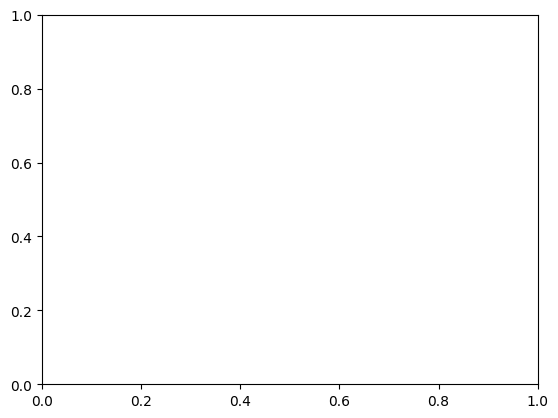

In [135]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig= plt.figure()

plt.fill_between(x, err_p, err_n)
#plt.set_title('fill between y1 and y2')
#plt.set_xlabel('x')
plt.tight_layout()

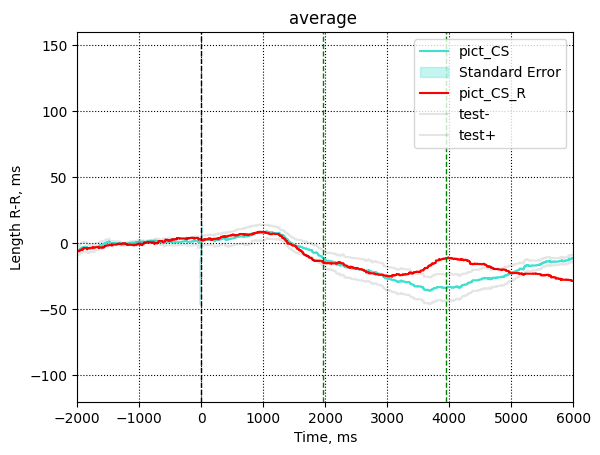

In [102]:
fig

In [43]:
subjects = ['W001', 'W002', 'W003', 'W004', 'W005', 'W006', 'W007', 'W008']
a = ['W001', 'W005']
b = ['W002', 'W006']
c = ['W003', 'W007']
d = ['W004', 'W008']
if subj in a:
        prot = 'a' 
if subj in b:
        prot = 'b'
if subj in c:
        prot = 'c'
if subj in d:
        prot = 'd'



for subj in subjects:
    data_path = f'F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/av_av/'

    if prot == 'b' or subj == 'd':
        stimulus = [['pict_CS','pict_CS_R'],['comb_CS','comb_CS_R']]
        stimulus_name = [['Pictu_Cfg_minus_A','Pictu_Elm_plus_AR'],['Compl_Elm_minus_A','Compl_Cgf_plus_AR']] 

    else:
        stimulus = [['sound_CS', 'sound_CS_R'],['comb_CS','comb_CS_R']]
        stimulus_name = [['Sound_Cfg_minus_A','Sound_Elm_plus_AR'],['Compl_Elm_minus_A','Compl_Cgf_plus_AR']] 
         
        for sn, s in enumerate(stimulus):

            df_for_ave1 = pd.DataFrame()
            df_for_ave2 = pd.DataFrame()
            
            try:
                
                df_timecourse1 = pd.read_csv(op.join(data_path, f'{subj}_{s[0]}.csv'))
                df_timecourse2 = pd.read_csv(op.join(data_path, f'{subj}_{s[1]}.csv'))

                df_for_ave1[f'RR_{s}'] = df_timecourse1['average_RR']
                df_for_ave2[f'RR_{s}'] = df_timecourse2['average_RR']
    
            except (OSError, FileNotFoundError):
                print (f'subject {subj} has no {subj}_{s[0]}.csv')   


            df_for_ave1['average_RR'] = df_for_ave1.mean(axis= 1)
            df_for_ave2['average_RR'] = df_for_ave2.mean(axis= 1)
            
            df_for_ave1['SE_RR'] = df_for_ave1.sem(axis= 1)
            df_for_ave2['SE_RR'] = df_for_ave2.sem(axis= 1)

            df_for_ave1['time_norm, ms'] = df_0['time_norm, ms']
            df_for_ave2['time_norm, ms'] = df_0['time_norm, ms']

            df_for_ave1.to_csv(f'F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/av_av/av_se/{s[0]}.csv')
            df_for_ave2.to_csv(f'F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/av_av/av_se/{s[1]}.csv')
            


subject W001 has no W001_sound_CS.csv
subject W001 has no W001_comb_CS.csv
subject W002 has no W002_sound_CS.csv
subject W002 has no W002_comb_CS.csv
subject W003 has no W003_sound_CS.csv
subject W003 has no W003_comb_CS.csv
subject W004 has no W004_sound_CS.csv
subject W004 has no W004_comb_CS.csv
subject W005 has no W005_sound_CS.csv
subject W005 has no W005_comb_CS.csv
subject W006 has no W006_sound_CS.csv
subject W006 has no W006_comb_CS.csv
subject W007 has no W007_sound_CS.csv
subject W007 has no W007_comb_CS.csv
subject W008 has no W008_sound_CS.csv
subject W008 has no W008_comb_CS.csv


In [ ]:
        fig = plt.figure()
                

                
        plt.plot(df_for_ave1['time_norm, ms'].tolist(), df_for_ave1['average_RR'].tolist(), color = 'turquoise', label=f'{stimulus_name[sn][0]}')
                
                
        plt.plot(df_for_ave2['time_norm, ms'].tolist(), df_for_ave2['average_RR'].tolist(), color = 'red', label=f'{stimulus_name[sn][1]}')              
                
     
        plt.legend(loc='best')
        plt.xlabel('Time, ms')
        plt.ylabel('Length R-R, ms')
        plt.title(f'{subj}, average actives 2/5 {stimulus_name[sn][0]} and {stimulus_name[sn][1]}')
        #plt.title(f'{subj} , {r}, CS+P vs {stimulus_name[sn]}')
        #plt.ylim([-140, 220]) 
        plt.ylim([-120, 160]) 
        plt.xlim([-2000, 6000])
        plt.axvline(x = 1970, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
        plt.axvline(x = 3940, color = 'g', label='line 2',linestyle='dashed',linewidth=1)
        plt.axvline(x = 0, color = 'k', label='line 2',linestyle='dashed',linewidth=1)
        #plt.axhline(y = 0, color = 'k', label='line 1',linestyle='dashed',linewidth=1)
                

        plt.grid(which='major', color = 'k', linestyle = ':')
                

        fig.savefig('F:/MSUPE/piansrann/data_processing/ecg_timecourse_data_exp_baselined/av_av/{0}_{1}_vs_{2}.jpeg'.format(subj, s[0], s[1]), dpi=300)
        plt.close()
